In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/SuicideDeathRates.csv")

In [3]:
df2 = df.loc[:, ["UNIT_NUM", "STUB_NAME", "STUB_NAME_NUM", "STUB_LABEL", "AGE_NUM", "YEAR", "ESTIMATE"]]

age_num = [1, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, 6.0]
df2 = df2[(df2["UNIT_NUM"] == 2)&(df2["STUB_NAME"] == "Age")&(df2["AGE_NUM"] != 5)&(df2["AGE_NUM"] != 4)&
            (df2["AGE_NUM"] != 3)&(df2["AGE_NUM"] != 2)&(df2["YEAR"] >= 2000)]

In [4]:
columns = df2["STUB_LABEL"].unique().tolist()

In [5]:
data = {}

for group in columns:
    data[group] = {}
    years = df2["YEAR"][df2["STUB_LABEL"] == group].tolist()
    for year in years:
        data[group][year] = df2.loc[(df2["YEAR"] == year)&(df2["STUB_LABEL"] == group), "ESTIMATE"].values[0]

In [6]:
df_final = pd.DataFrame.from_dict(data)

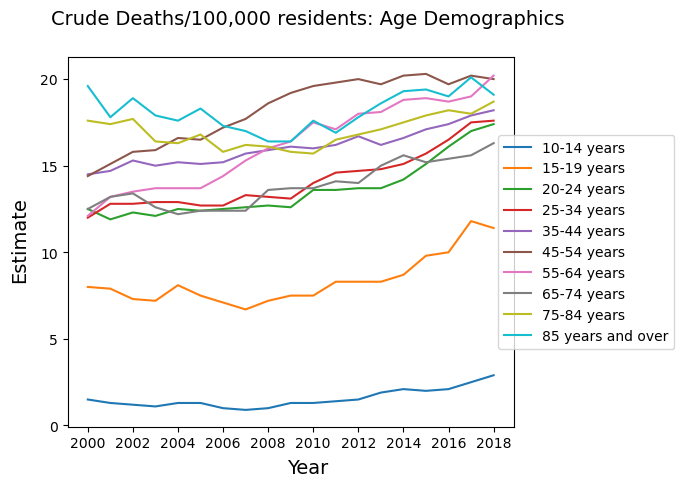

In [7]:
fig, ax = plt.subplots()
fig.suptitle("Crude Deaths/100,000 residents: Age Demographics", fontsize = 14)
ax.plot(df_final, label = df_final.columns)
ax.locator_params(integer = True)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 1])
ax.legend(loc = "center right", bbox_to_anchor = (1.375, 0.5))
ax.xaxis.set_ticks(range(2000, 2019, 2))
fig.text(0.5, 0.025, "Year", ha = "center", va = "center", fontsize = 14)
fig.text(0.05, 0.5, "Estimate", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

In [8]:
percent_change = {}

for group in df_final.columns:
    x2 = df_final.at[2018, group]
    x1 = df_final.at[2000, group]
    percent_change_num = round((x2 - x1) / x1 * 100)
    percent_change[group] = percent_change_num

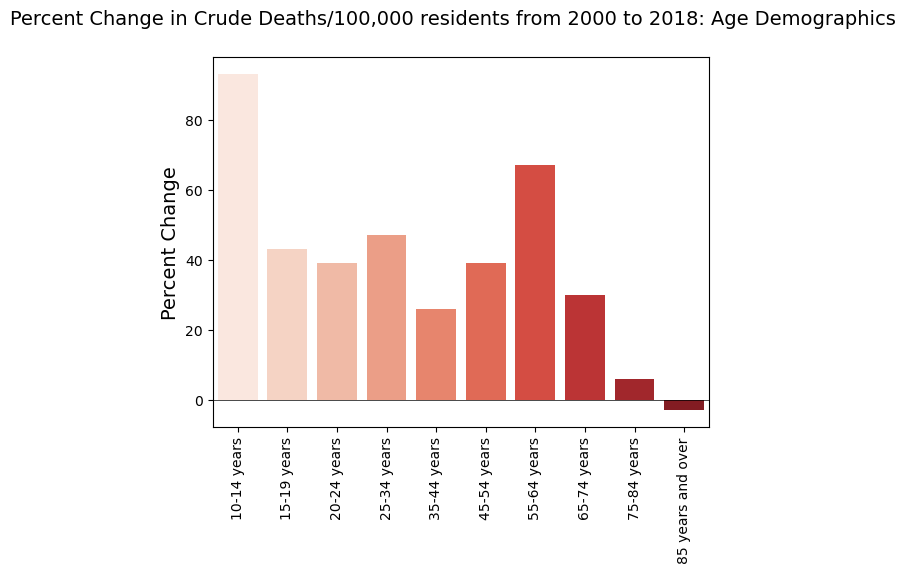

In [9]:
fig, ax1 = plt.subplots()
fig.suptitle("Percent Change in Crude Deaths/100,000 residents from 2000 to 2018: Age Demographics", fontsize = 14)
groups = list(percent_change.keys())
values = list(percent_change.values())
sns.barplot(ax = ax1, x = groups, y = values, dodge = False, palette = "Reds")
ax1.set_xticklabels(groups, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
plt.axhline(y = 0, color = "Black", linewidth = 0.5)
plt.show()